# Spark DataFrames

## Корисні посилання
- [Spark SQL, DataFrames and Datasets Guide](https://spark.apache.org/docs/latest/sql-programming-guide.html)
- [Spark DataFrames in Python](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PySpark_SQL_Cheat_Sheet_Python.pdf)
- [Spark in Python](http://datacamp-community.s3.amazonaws.com/4d91fcbc-820d-4ae2-891b-f7a436ebefd4)
-  https://spark.apache.org/docs/latest/api/python/pyspark.sql.html

[PySpark API](https://spark.apache.org/docs/latest/api/python/index.html).


### DataFrames це :
- абстракція в Spark, який надається перревага
- суворо типызована колекція розподілених елементів
- побудована на стійких розподілених наборах даних (RDD)
- незмінні після побудови

### За допомогою Dataframes ви можете:
- Відстежуйте інформацію про походження для ефективного перерахунку втрачених даних
- Можливі операції з паралельного збору елементів

### Створення DataFrames
- шляхом розпаралелювання існуючих колекцій (наприклад, Pandas DataFrames)
- шляхом перетворення існуючих DataFrames
- з файлів в HDFS або будь-який інший системі зберігання (наприклад, Parquet)

### Ознаки
- Можливість масштабування від кілобайт даних на одному ноутбуці до петабайт у великому кластері
- Підтримка широкого спектру форматів даних та систем зберігання
- Повна інтеграція з усіма інструментами і інфраструктурою великих даних через Spark
- API для Python, Java, Scala і R

### DataFrames vs RDDs
- Зручне API для нових користувачів, знайомих з фреймами даних на інших мовах програмування.
- Для існуючих користувачів Spark API спростить програмування Spark, ніж з використанням RDD.
- Для обох груп користувачів DataFrames підвищить продуктивність за рахунок інтелектуальної оптимізації та генерації коду.

## PySpark Shell

**Запуск Spark shell:**

~~~ bash
pyspark
~~~

З'явиться результат, схожий на наведений нижче, а потім запрошення >>>:
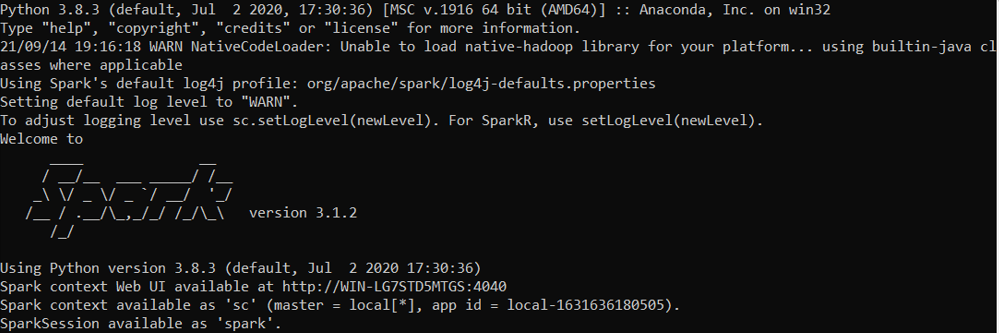
~~~

>>>
~~~
Читання даних і перетворення в Dataset

~~~ py
df = sqlContext.read.csv("/tmp/irmar.csv", sep=';', header=True)
~~~

~~~
>>> df2.show()
+---+--------------------+------------+------+------------+--------+-----+---------+--------+
|_c0|                name|       phone|office|organization|position|  hdr|    team1|   team2|
+---+--------------------+------------+------+------------+--------+-----+---------+--------+
|  0|      Alphonse Paul |+33223235223|   214|          R1|     DOC|False|      EDP|      NA|
|  1|        Ammari Zied |+33223235811|   209|          R1|      MC| True|      EDP|      NA|
.
.
.
| 18|    Bernier Joachim |+33223237558|   214|          R1|     DOC|False|   ANANUM|      NA|
| 19|   Berthelot Pierre |+33223236043|   601|          R1|      PE| True|       GA|      NA|
+---+--------------------+------------+------+------------+--------+-----+---------+--------+
only showing top 20 rows
~~~

## Трансформації (Transformations), дії (Actions), властивості

Like RDDs, DataFrames are lazy. Transformations contribute to the query plan, but they don't execute anything.
Actions cause the execution of the query.
Як і RDD, DataFrames "lazy". Перетворення вносяться до плану запитів, але нічого не виконують.
Виконання запитів викликають дії .

### Приклади трансформацій
- filter
- select
- drop
- intersect
- join
### Приклади дій
- count
- collect
- show
- head
- take

# Основи Dataframe  для
 PySpark

**Початок Spark Session**

In [3]:
import findspark
import pandas as pd #This imports Pandas (we will be using this extensively later)
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

sc = spark.sparkContext

In [5]:
sc

<SparkContext master=local[*] appName=Learning_Spark>

Почнемо з підмножини даних Titanic на Kaggle і завантажимо їх у фрейм даних pandas, а потім перетворимо його у фрейм даних Spark.

In [6]:
data1 = {'PassengerId': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
         'Name': {0: 'Owen', 1: 'Florence', 2: 'Laina', 3: 'Lily', 4: 'William'},
         'Sex': {0: 'male', 1: 'female', 2: 'female', 3: 'female', 4: 'male'},
         'Survived': {0: 0, 1: 1, 2: 1, 3: 1, 4: 0}}

data2 = {'PassengerId': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
         'Age': {0: 22, 1: 38, 2: 26, 3: 35, 4: 35},
         'Fare': {0: 7.3, 1: 71.3, 2: 7.9, 3: 53.1, 4: 8.0},
         'Pclass': {0: 3, 1: 1, 2: 3, 3: 1, 4: 3}}

df1_pd = pd.DataFrame(data1, columns=data1.keys())
df2_pd = pd.DataFrame(data2, columns=data2.keys())

Подивимось на перший дата фрейм Panda

In [7]:
df1_pd

,PassengerId,Name,Sex,Survived
0,1,Owen,male,0
1,2,Florence,female,1
2,3,Laina,female,1
3,4,Lily,female,1
4,5,William,male,0


І на 2-ий

In [8]:
df2_pd

,PassengerId,Age,Fare,Pclass
0,1,22,7.3,3
1,2,38,71.3,1
2,3,26,7.9,3
3,4,35,53.1,1
4,5,35,8.0,3


**Тепер ми перетворюємо dataframe Panda у dataframe Spark і відображаємо його вміст**

In [11]:
df1 = spark.createDataFrame(df1_pd)
df2 = spark.createDataFrame(df2_pd)
df1.show()

Py4JJavaError: An error occurred while calling o99.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1.0 failed 1 times, most recent failure: Lost task 0.0 in stage 1.0 (TID 1) (0xKolyanus executor driver): org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:398)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 26 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:398)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 26 more


Тепер подивимось на схему

In [10]:
df1.printSchema()

root
 |-- PassengerId: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Survived: long (nullable = true)



Якщо дані структуровані, але не мають схеми (self-describing schema) або  неструктуровані і це не JSON  - Spark не може автоматично визначити схему. Її необхідно буде створити та "накласти" на дані.

# Основні перетворення фрейму даних

![alt text](https://changhsinlee.com/figure/source/2018-03-04-pyspark-dataframe-basics/dataframe-verbs.png)

**Select**

Приймає або список імен стовпців, або розпакований список.

In [13]:
cols1 = ['PassengerId', 'Name']
df1.select(cols1).show(1)

Py4JJavaError: An error occurred while calling o137.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3.0 failed 1 times, most recent failure: Lost task 0.0 in stage 3.0 (TID 3) (0xKolyanus executor driver): org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:398)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 26 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:398)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 26 more


**Filter**

Фільтр із виразом стовпця

In [ ]:
df1.filter(df1.Sex == 'female').show()

Фільтр із виразом SQL. Зверніть увагу на подвійні та одинарні лапки

In [ ]:
df1.filter("Sex='male'").show()

**Зміна або створення нових стовпціі**

Створення нових стовпців у Spark використовує `.withColumn()`

In [ ]:
df2.withColumn('AgeTimesFare', df2.Age*df2.Fare).show()

**Summarize and group by**

Щоб підсумувати або агрегувати фрейм даних, спочатку вам потрібно перетворити фрейм даних в об’єкт *GroupedData* за допомогою `groupby()`, а потім викликати перетворення aggregate .

In [ ]:
gdf2 = df2.groupby('Pclass')
gdf2

Примітка. Ми беремо середнє значення для більш ніж одного стовпця, передаючи розпакований список імен стовпців

In [ ]:
avg_cols = ['Age', 'Fare']
gdf2.avg(*avg_cols).show() #Note the *, this is unpacking the list!

Щоб викликати кілька функцій агрегації одночасно, передайте словник

In [ ]:
gdf2.agg({'*': 'count', 'Age': 'avg', 'Fare':'sum'}).show()

Ці назви стовпців читаються не дуже зручно,їх варто перетворити за допомогою `toDF()`

In [ ]:
(
  gdf2.agg({'*': 'count', 'Age': 'avg', 'Fare':'sum'})
    .toDF('Pclass', 'counts', 'average_age', 'total_fare')
    .show()
)

**Arrange (sort)**

Використовуйте метод .sort() для сортування dataframes.

In [ ]:
df2.sort('Fare', ascending=False).show()

**Joins and unions**

Є два способи об'єднання фреймів даних --- joins and unions. Ідея тут така ж, як об’єднання та об’єднання таблиць у SQL.

**Joins**

Давайте об’єднаємо 2 датафрейми на основі колонки *PassengerId*

In [ ]:
df1.join(df2, ['PassengerId']).show()

**Nonequi joins**

Вони можуть бути дуже повільними через викривлення даних, але це одна з операцій, яку Spark може виконувати, тоді як Hive ні.

In [ ]:
df1.join(df2, df1.PassengerId <= df2.PassengerId).show()

**Unions**

`Union()`  повертає фрейм даних із об’єднання двох фреймів даних

In [ ]:
df1.union(df1).show()

# Детальніше

**Explain(), transformations, and actions**

Коли ви створюєте фрейм даних у PySpark, на відміну від об’єктів Python, фрейми даних оцінюються "ліниво". Це означає, що більшість операцій є перетвореннями, які змінюють план виконання щодо того, як Spark має обробляти дані, але план не виконується, поки ми не викличемо дію.

Наприклад, якщо ми хочемо об’єднати df1 і df2 за ключем PassengerId, як раніше:

In [ ]:
df1.explain()

In [ ]:
df2.explain()

In [ ]:
dfj1 = df1.join(df2, ['PassengerId'])
dfj1.explain()

In this case, `join()` is a transformation that laid out a plan for Spark to join the two dataframes, but it wasn't executed unless you call an action, such as `.count()`, that has to go through the actual data defined by df1 and df2 in order to return a Python object (integer).

У цьому випадку join() — це перетворення, яке містить план, щоб Spark об’єднав два фрейми даних, але воно не було виконано, якщо ви не викличете дію, наприклад .count(), яка має пройти через фактичні дані визначено df1 і df2, щоб повернути об’єкт Python (ціле число).

In [ ]:
dfj1.count()

# Зберігання даних: cache() and checkpoint()

**caching**

Правильне кешування є ключем до високої продуктивності Spark.


Основне правило: **кешуйте фрейм даних, в сценарії кілька разів.**

Правильне кешування є ключем до високої продуктивності Spark.

Основне правило: кешуйте фрейм даних, коли він використовується в сценарії кілька разів.

Майте на увазі, що він кешується лише після *першої дії*. Якщо з будь-якої причини ви хочете переконатися, що дані кешуються, перш ніж зберегти фрейм даних, вам доведеться викликати таку дію, як  `.count()`                                                                                                                                                                                                       

In [ ]:
df1.cache()

In [ ]:
df1 = df1.cache()

Щоб перевірити, чи кешується фрейм даних, перевірте властивість storageLevel.

In [ ]:
df1.storageLevel

Щоб декешувати фрейм даних, використовуйте `unpersist()`

In [ ]:
df1.unpersist()
df1.storageLevel

**Checkpointing**

`checkpoint()` скорочує план виконання та зберігає фрейм даних контрольної точки у тимчасове місце на диску.

Рекомендується виконувати кешування перед контрольною точкою, щоб Spark не довелося читати фрейм даних з диска після неї.

Щоб використовувати `checkpoint()`, вам потрібно вказати тимчасове розташування файлу для збереження даних, звернувшись до об’єкта sparkContext із SparkSession.

In [ ]:
sc = spark.sparkContext
sc.setCheckpointDir("/checkpointdir") # save to ./checkpointdir

Наприклад, давайте приєднаємо df1 до себе тричі:

In [ ]:
df = df1.join(df1, ['PassengerId'])
df.join(df1, ['PassengerId']).explain()

 Застосуємо `checkpoint()` після першого `join`, щоб скоротити план.

In [ ]:
df = df1.join(df1, ['PassengerId']).checkpoint()
df.join(df1, ['PassengerId']).explain()

**Partitions and repartition()**

Поширеною причиною проблем з продуктивністю є занадто багато розподілів даних.

Щоб перевірити їх кількість, використовуйте `.rdd.getNumPartitions()`:

In [ ]:
df1.rdd.getNumPartitions()

Цей фрейм даних, незважаючи на те, що має лише 5 рядків, має 2 розділи.

Це забагато, давайте перерозподілимо лише на 1 розділ.

In [ ]:
df1_repartitioned = df1.repartition(1)
df1_repartitioned.rdd.getNumPartitions()

# Spark dataframes на HDFS

Ми розглядаємо набір даних [the New York City Taxi Cab dataset](https://www.kaggle.com/c/nyc-taxi-trip-duration/data). Сюди входять усі поїздки в Нью-Йорку з 2009 року.

На [цьому сайті](http://chriswhong.github.io/nyctaxi/) ви можете побачити дані для одного випадкового таксі за один день.

Ще більше інформації ви можете знайти на веб-сайті [NYC TLC's website](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)


## Завантаження даних

Зазвичай ми читаємо та завантажуємо ці дані в пам’ять як фрейм даних Pandas. Однак у цьому випадку це було б нерозумно, оскільки ці дані занадто великі, щоб поміститися в оперативну пам’ять.

Дані можуть залишатися у файловій системі hdfs, але з міркувань продуктивності ми не можемо використовувати формат csv. Файл великий і має текстовий формат. Доступ до даних дуже повільний.

Ви можете конвертувати файл csv у формат parquet за допомогою Spark.

In [ ]:
%%time
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("Convert CSV to parquet") \
        .master("spark://svmass2.mass.uhb.fr:7077") \
        .config('spark.hadoop.parquet.enable.summary-metadata', 'true') \
        .getOrCreate()

df = spark.read.csv("hdfs://svmass2.mass.uhb.fr:54310/data/nyc-taxi-csv/2009/yellow*.csv",
                    header="true",inferSchema="true")

df.write.parquet("hdfs://svmass2.mass.uhb.fr:54310/user/navaro_p/2009-yellow.parquet")

spark.stop()


## Spark Cluster

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/cluster-overview.png?raw=1)

```py
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .master('spark://svmass2.mass.uhb.fr:7077') \
        .getOrCreate()
spark
```

SparkSession підключений до власного автономного менеджера кластерів Spark (також можна використовувати YARN). Менеджер розподіляє ресурси між додатками. Після підключення Spark отримує виконавців на вузлах в кластері, які є процесами, та виконують обчислення та зберігають дані для вашої програми. Далі він надсилає код  програми (файл Python) виконавцям. Нарешті, завдання надсилаються виконавцям для виконання.

Spark може отримати доступ до файлів, розташованих на hdfs, а також до локальних файлів. Наприклад:

```py
df = spark.read.parquet('file:///home/navaro_p/nyc-taxi/2016.parquet')
```

### Завдання

Виберіть рік і прочитайте та конвертуйте файли csv у формат parquet на вашому  каталозі hdfs.
Для роботи з кластером не запускайте код Python всередині комірки блокнота. Збережіть сценарій Python і замість цього запустіть його з терміналу. У блокноті Jupyter ви не побачите жодного прогресу чи інформації, якщо станеться помилка.
Використовуйте командну оболонку [`spark-submit`](https://spark.apache.org/docs/latest/submitting-applications.html), щоб запустити свій сценарій на кластері.
Ви можете керувати журналом за допомогою
```py
spark.sparkContext.setLogLevel('ERROR')
```
Допустимі log рівні включають: ALL, DEBUG, ERROR, FATAL, INFO, OFF, TRACE, WARN

**Краще спробувати спочатку скріпт з одним файлом, перш ніж робити це для всього року.**

**Уважно дослідіть наведений вище код. Для коректної роботи ви повинні змінити його частину**

## Деякі приклади, які можна запустити за допомогою кластера

- Читаємо файли даних тNYC taxi data за 2016 рік і вибираємо деякі змінні

```py
columns = ['tpep_pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'tip_amount', 'total_amount']

df = (spark.read.parquet('hdfs://svmass2.mass.uhb.fr:54310/user/navaro/nyc-taxi/2016.parquet').select(*columns))
```

- Сумуємо загальну кількість пасажирів
```py
df.agg({'passenger_count': 'sum'}).collect()
```

- Середня кількість пасажирів за одну поїздку`
```py
df.agg({'passenger_count': 'avg'}).collect()
```

- Скільки поїздок з 0,1,2,3,...,9 пасажирами`
```py
df.groupby('passenger_count').agg({'*': 'count'}).collect()
```


### Поради


- **Напишіть програму на Python і використовуйте spark-submit`**
- **Читайте файли формату parquet замість файлів csv**
- **Не забудьте spark.stop() в кінці сценарію**

## Підказки

- Як видалити рядки
```python
df = df.filter(df.name == 'expression')
```

- Як створити нові колонки
```python
df = df.withColumn('var2', df.var0 + df.var1)
```

- Як виконати групування / агрегування
```python
df.groupBy(df.name).agg({'column-name': 'avg'})
```

Коли ви хочете отримати результат обчислень, використайте метод .collect().

### Завдання

1. З'ясуйте наскільки добре люди давали "чайові" в залежності від кількості пасажирів у таксі. Для цього потрібно:

-  Вилучіть поїздки з нульовим тарифом
-  Додайте новий стовпець `tip_fraction` який дорівнює відношенню чайових до тарифу.
- Згрупуйте за стовпцем `passenger_count`  і візьміть середнє значення стовпця `tip_fraction`.

2. Побудуйте графік чайових як функцію від години доби та дня тижня?
3. Дослідіть стовпець `payment_type`. Подивіться, наскільки добре кожен із типів платежів корелює з tip_fraction.
4. Побудуйте середнє значення нового стовпця tip_fraction, згрупованого за днями тижня.
5. Побудуйте середнє значення нового стовпця tip_fraction, згрупованого за годинами дня.


### Для виконання завдання краще використати інший датасет та самостійно сформулювати завдання відповідно до специфіки даних на основі операцій з Spark DataFrames

